군집 분석(Cluster Analysis)
   - 군집 분석은 데이터의 특성에 따라 유사한 것끼리 묶음
   - 유사성을 기반으로 군집을 분류하고, 군집에 따라 유형별 특징을 분석하는 기법
   - 텍스트에 대한 군집 분석에서는 군집으로 묶여진 텍스트들끼리는 최대한 유사하고, 다른 군집으로 묶여진 텍스트들과는 최대한 유사하지 않도록 분류

텍스트 유사도
   - 텍스트 쌍에 대한 자카드 유사도와 코사인 유사도 계산
   - 자카드 유사도(Jaccard Similarity) : 두 텍스트 문서 사이에 공통된 용어의 수와 해당 텍스트에 존재하는 총 고유 용어 수의 비율을 사용
   - 코사인 유사도(Cosine Similarity) : 백터 표현 사이의 각도에 대한 코사인 값을 사용. BoW와 TF-IDF 행렬은 텍스트에 대한 백터 표현으로 활용 가능

In [46]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bitcamp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bitcamp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [47]:
# 자카드 유사도 만들기
def jaccard_similarity(d1, d2):
    lemmatizer = WordNetLemmatizer()
    
    words1 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d1)]
    words2 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d2)]
    
    inter = len(set(words1).intersection(set(words2)))
    union = len(set(words1).union(set(words2)))
    
    return inter/union

In [48]:
d1 = "Think like a man of action and act like man of thought."
d2 = "Try not to become a man of success but rather try to become a man of value."
d3 = "Give me liberty, of give me death."

print(jaccard_similarity(d1, d2))
print(jaccard_similarity(d1, d3))
print(jaccard_similarity(d2, d3))

0.2222222222222222
0.13333333333333333
0.11764705882352941


In [49]:
import warnings
warnings.filterwarnings('ignore')

tiv = TfidfVectorizer()
corpus = [d1, d2, d3]

tfidf = tiv.fit_transform(corpus).todense()


print(cosine_similarity(tfidf[0], tfidf[1]))
print(cosine_similarity(tfidf[0], tfidf[2]))
print(cosine_similarity(tfidf[1], tfidf[2]))

[[0.22861951]]
[[0.06083323]]
[[0.04765587]]


데이터 전처리 
   - 네이버 영화 리뷰 : https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt

In [53]:
import urllib.request

raw = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt').readlines()

raw = [x.decode() for x in raw[1:10000]]

reviews = []
for i in raw:
    reviews.append(i.split('\t')[1])
    
print(reviews[:5])

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지', '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.']


In [54]:
# 형태소 분석하기
from konlpy.tag import Mecab

tagger = Mecab('C:Mecab/mecab-ko-dic')
reviews = [tagger.morphs(x) for x in reviews]

print(reviews[:5])

[['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'], ['디자인', '을', '배우', '는', '학생', '으로', ',', '외국', '디자이너', '와', '그', '들', '이', '일군', '전통', '을', '통해', '발전', '해', '가', '는', '문화', '산업', '이', '부러웠', '는데', '.', '사실', '우리', '나라', '에서', '도', '그', '어려운', '시절', '에', '끝', '까지', '열정', '을', '지킨', '노라노', '같', '은', '전통', '이', '있', '어', '저', '와', '같', '은', '사람', '들', '이', '꿈', '을', '꾸', '고', '이뤄나갈', '수', '있', '다는', '것', '에', '감사', '합니다', '.'], ['폴리스', '스토리', '시리즈', '는', '1', '부터', '뉴', '까지', '버릴', '께', '하나', '도', '없', '음', '.', '.', '최고', '.'], ['와', '.', '.', '연기', '가', '진짜', '개', '쩔', '구나', '.', '.', '지루', '할거', '라고', '생각', '했', '는데', '몰입', '해서', '봤', '다', '.', '.', '그래', '이런', '게', '진짜', '영화', '지'], ['안개', '자욱', '한', '밤하늘', '에', '떠', '있', '는', '초승달', '같', '은', '영화', '.']]


Word2Vec 생성

   - word2vec 생성에 필요한 라이브러리들 추가

In [55]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager as fm
from matplotlib import rc

   - Word2Vec 모델 생성
   - gensim의 Word2Vec은 선언과 동시에 학습을 해 단어 백터들을 생성

In [73]:
word2vec = Word2Vec(reviews, min_count=5)
word2vec

In [74]:
word2vec.wv.most_similar('영화')   # 영화에 대해서 유사한 단어 리스트 출력

[('작품', 0.9182803630828857),
 ('듯', 0.9166916608810425),
 ('마음', 0.8968977928161621),
 ('모습', 0.8947232365608215),
 ('이야기', 0.8943783044815063),
 ('표현', 0.8846536874771118),
 ('가슴', 0.8836544156074524),
 ('잔잔', 0.8815519213676453),
 ('에게', 0.8804699778556824),
 ('느낌', 0.8788571357727051)]

   - t-sne을 이용한 단어 백터 시각화

In [75]:
# TSNE가 뭘까요...?
tsne = TSNE(n_components=2)
tsne

TSNE()

In [85]:
vocab = word2vec.wv.key_to_index
vocab
similarity = word2vec.wv[vocab]
similarity

array([[-0.18856093,  0.322333  ,  0.16772848, ..., -0.21765214,
         0.00667273, -0.39977255],
       [-0.21276383,  0.20005381, -0.20308161, ..., -0.7463394 ,
         0.00408685, -0.3879203 ],
       [ 0.26065212,  0.3236724 , -0.3580765 , ..., -0.6391182 ,
         0.4819358 , -0.27183005],
       ...,
       [ 0.00340046,  0.02719383, -0.00632838, ..., -0.04243804,
         0.02623881,  0.00206158],
       [-0.01145761,  0.0360916 , -0.01045491, ..., -0.03016219,
         0.03498358, -0.02578004],
       [ 0.00771235,  0.03674442, -0.00744549, ..., -0.02578264,
         0.01724195, -0.02014797]], dtype=float32)

In [89]:
# vocab 시각화 (pandas)
import pandas as pd

transform_similarity = tsne.fit_transform(similarity)
transform_similarity
df = pd.DataFrame(transform_similarity, index=vocab, columns=['x', 'y'])
print(df[:5])

            x          y
.   60.065475  -0.881519
이   52.611778 -17.154840
는   50.096165 -20.504459
영화  48.055229 -12.736648
다   68.895103  -3.884409


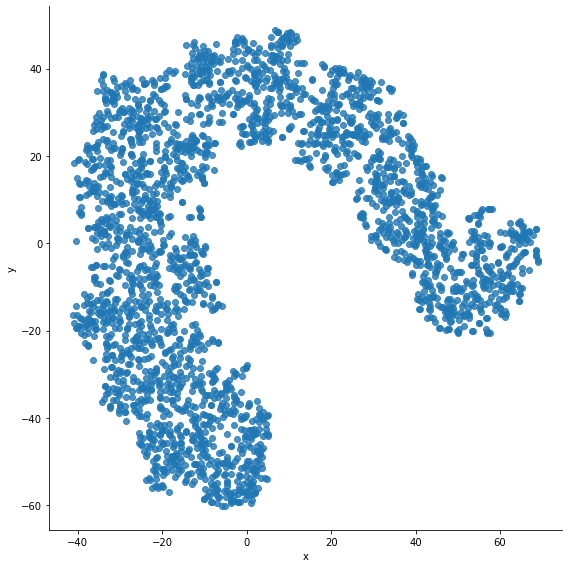

In [90]:
# vocab 시각화 2 (seaborn)
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot('x','y', data=df, fit_reg=False, size=8)
plt.show()

Scikit-learn, Scipy를 이용한 계층적 군집화

   - 계층적 군집화란 개별 개체들을 유사한 개체나 그룹과 통합해 군집화를 수행하는 알고리즘
   - 비계층적 군집화와는 달리 군집 수를 지정하지 않아도 군집화를 할 수 있는 것이 장점
   - 계층적 군집화는 모든 개체간 거리나 유사도가 미리 계산되어 있어야만 하며, 계산복잡도도 비계층적 군집화보다 큼

Scikit-learn

   - 비계층적 군집화의 일종인 agglomerativeClustering(병합군집)을 이용, 계층적 군집화 실습
   - 병합 군집은 각 개체들을 클러스터로 간주, 종료 조건을 만족할 때 까지 가장 비슷한 두 클러스터들을 합치며 진행
   - 병합 군집의 종료 조건에는 3가지를 지정 가능
      - 1. ward : 모든 클러스터 내의 분산을 가장 적게 증가시키는 두 클러스터를 합침(기본값)
      - 2. average : 클러스터간 평균 거리가 가장 짧은 두 클러스터를 합침
      - 3. complete : 클러스터간 최대 거리가 가장 짧은 두 클러스터를 합침

   - 1. ward(Default)

In [91]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters=6, linkage='ward')  # linkage : 병합 군집의 종료 조건 종류
predict = ward.fit_predict(df)
predict

array([5, 5, 5, ..., 4, 4, 4], dtype=int64)

In [92]:
results = df
results['predict'] = predict
results[:10]

,x,y,predict
.,60.065475,-0.881519,5
이,52.611778,-17.154840,5
는,50.096165,-20.504459,5
영화,48.055229,-12.736648,5
다,68.895103,-3.884409,5
고,60.633259,-12.795961,5
의,45.468716,-19.381342,5
하,61.316959,-16.137114,5
을,49.934162,-20.350088,5
에,48.232487,-18.060631,5


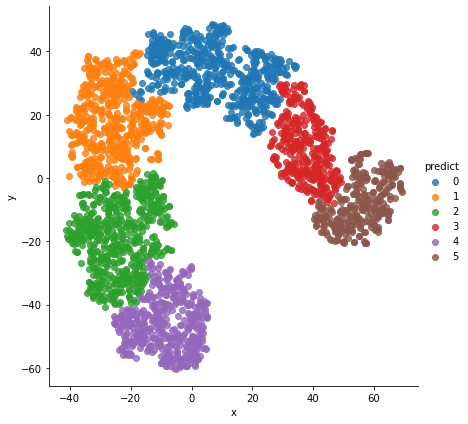

In [94]:
sns.lmplot('x','y', data=results, fit_reg=False, size=6, hue="predict")
plt.show()

   - 2. average

In [95]:
avg = AgglomerativeClustering(n_clusters=6, linkage='average')
predict = avg.fit_predict(df)
predict


array([5, 5, 5, ..., 4, 4, 4], dtype=int64)

In [96]:
results = df
results['predict'] = predict
results[:10]

,x,y,predict
.,60.065475,-0.881519,5
이,52.611778,-17.154840,5
는,50.096165,-20.504459,5
영화,48.055229,-12.736648,5
다,68.895103,-3.884409,5
고,60.633259,-12.795961,5
의,45.468716,-19.381342,5
하,61.316959,-16.137114,5
을,49.934162,-20.350088,5
에,48.232487,-18.060631,5


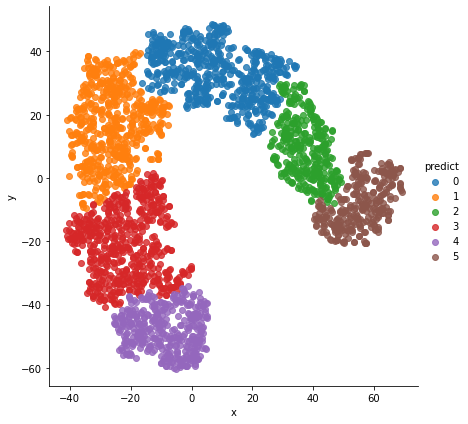

In [97]:
sns.lmplot('x','y', data=results, fit_reg=False, size=6, hue='predict')

   - 3. complete

In [99]:
compl = AgglomerativeClustering(n_clusters=6, linkage='complete')
predict = compl.fit_predict(df)
predict

array([4, 4, 4, ..., 0, 0, 0], dtype=int64)

In [100]:
results = df
results['predict'] = predict
results[:10]

,x,y,predict
.,60.065475,-0.881519,4
이,52.611778,-17.154840,4
는,50.096165,-20.504459,4
영화,48.055229,-12.736648,4
다,68.895103,-3.884409,4
고,60.633259,-12.795961,4
의,45.468716,-19.381342,4
하,61.316959,-16.137114,4
을,49.934162,-20.350088,4
에,48.232487,-18.060631,4


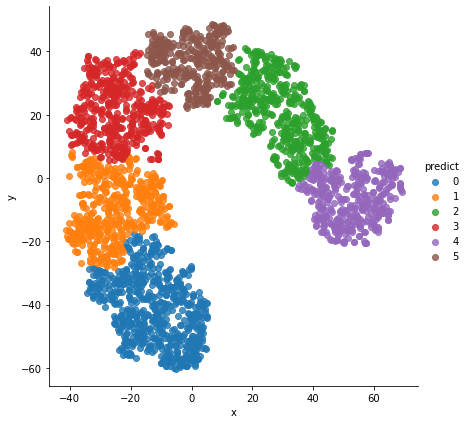

In [101]:
sns.lmplot('x','y', data=results, fit_reg=False, size=6, hue='predict')

Scipy

   - scipy를 이용한 거리 사용과 word2vec 사용을 비교
   - pdist를 이용한 각 단어간 유클리디안 거리 계산

In [104]:
# distance가 계산되어 있는 행렬

from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

distmatrix = pdist(df, metric='euclidean')
row_dist = pd.DataFrame(squareform(distmatrix))
row_dist

,0,1,2,3,4,5,6,7,8,9,...,2629,2630,2631,2632,2633,2634,2635,2636,2637,2638
0,0.000000,17.899123,22.010156,16.875725,9.326290,11.927964,23.564992,15.306841,21.946952,20.860046,...,72.690890,88.350627,90.815423,84.407763,95.693625,77.949101,76.005463,89.255119,90.971524,85.243981
1,17.899123,0.000000,4.189064,6.346855,21.005976,9.129292,7.482022,8.764471,4.168841,4.471985,...,66.829229,81.132332,85.332705,72.449243,84.114238,61.999381,62.489991,73.329953,75.799133,69.015870
2,22.010156,4.189064,0.000000,8.031458,25.092353,13.055700,4.761794,12.040762,0.223775,3.073368,...,65.218244,79.094990,83.683318,69.336600,81.045621,58.039355,59.057280,69.358443,71.969130,64.994865
3,16.875725,6.346855,8.031458,0.000000,22.642051,12.578169,7.130359,13.690751,7.841866,5.326933,...,61.514341,76.208374,80.006594,69.147155,80.680116,61.129216,59.937108,72.439482,74.319450,68.397382
4,9.326290,21.005976,25.092353,22.642051,0.000000,12.152113,28.088264,14.406840,25.112465,25.058112,...,81.503780,96.975681,99.745469,91.657211,103.126041,82.932266,82.533949,94.274991,96.573137,89.989032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,77.949101,61.999381,58.039355,61.129216,82.932266,71.060323,54.937742,69.819592,57.991063,57.930846,...,52.172075,53.794585,62.992646,28.398159,37.095929,0.000000,16.920086,11.355162,15.071535,7.621568
2635,76.005463,62.489991,59.057280,59.937108,82.533949,71.502688,55.031103,71.049372,58.948593,58.071522,...,35.867005,36.969086,46.094632,12.995730,23.987333,16.920086,0.000000,21.641852,18.423527,21.777032
2636,89.255119,73.329953,69.358443,72.439482,94.274991,82.389784,66.267387,81.118532,69.311959,69.263344,...,57.177525,55.566424,65.092339,29.073612,34.475825,11.355162,21.641852,0.000000,7.320631,5.183204
2637,90.971524,75.799133,71.969130,74.319450,96.573137,84.914230,68.531844,83.906742,71.901679,71.574603,...,52.455569,49.391621,58.952267,23.049779,27.334042,15.071535,18.423527,7.320631,0.000000,11.752666


   - 각 단어간 유클리디안 거리를 이용한 군집 분석 및 덴드로그램 시각화

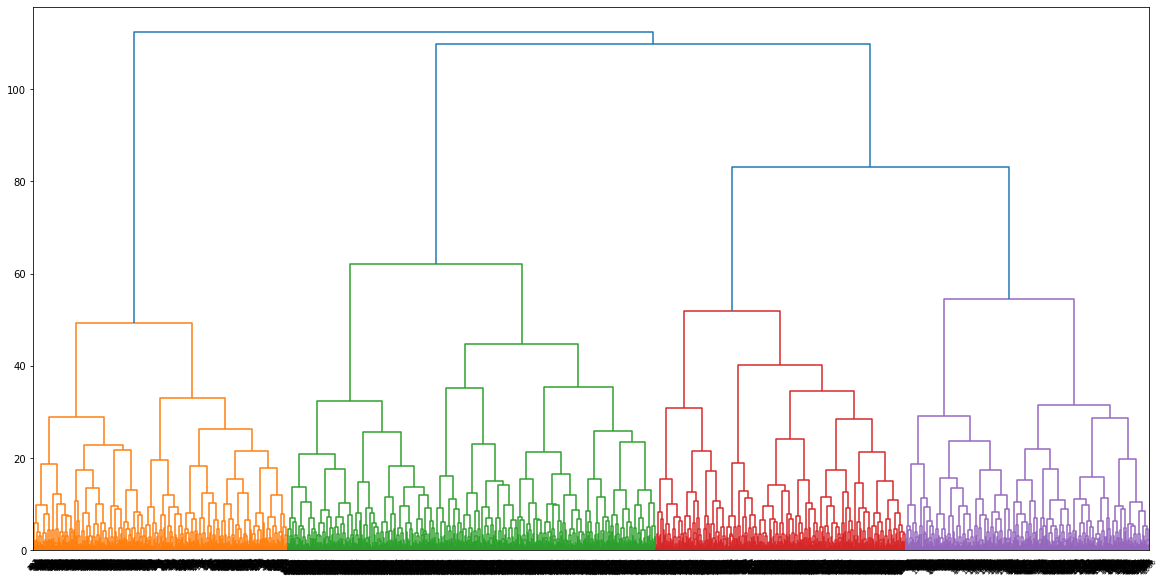

In [105]:
row_clusters = linkage(distmatrix, method='complete')   # distmatrix를 통해서 유클리디안 거리를 계산

plt.figure(figsize=(20, 10))
dendrogram(row_clusters, 
           leaf_rotation=50, 
           leaf_font_size=7)

plt.show()

   - word2vec을 이용한 군집 분석 및 덴드로그램 시각화

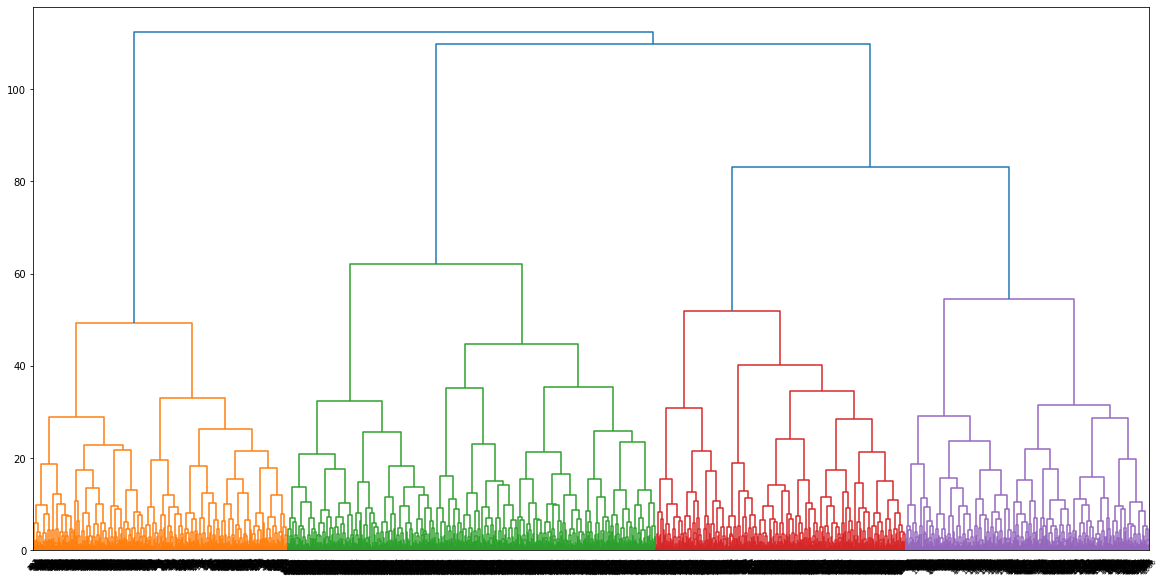

In [107]:
mergings = linkage(df, method='complete')

plt.figure(figsize=(20, 10))
dendrogram(mergings,
           leaf_rotation=50,
           leaf_font_size=7)

plt.show()

Scikit-learn을 이용한 비계층적 군집화

   - 비계층적 군집화는 계층적 군집화로 나눌 클러스터 계수를 지정해 각 계체가 어느 클러스터에 속하는 지를 결정
   - 계층적 군집화보다 계산 복잡도가 작기 때문에 대량의 데이터에 유리하나, 클러스터 개수에 따라 군집화 성능이 크게 좌우되기 때문에 조정이 필요

   - 대표적인 비계층적 군집화 알고리즘인 kmeans를 사용해 실습

 - 클러스터 개수 3

In [112]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
predict = kmeans.fit_predict(df)
predict

array([1, 1, 1, ..., 2, 2, 2])

In [113]:
results = df
results['predict'] = predict
results[:10]

,x,y,predict
.,60.065475,-0.881519,1
이,52.611778,-17.154840,1
는,50.096165,-20.504459,1
영화,48.055229,-12.736648,1
다,68.895103,-3.884409,1
고,60.633259,-12.795961,1
의,45.468716,-19.381342,1
하,61.316959,-16.137114,1
을,49.934162,-20.350088,1
에,48.232487,-18.060631,1


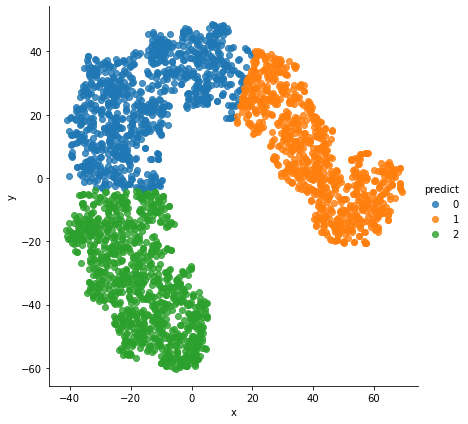

In [114]:
sns.lmplot('x', 'y', data=results, fit_reg=False, size=6, hue='predict')

 - 클러스터 개수 6

In [118]:
kmeans = KMeans(n_clusters=6)
predict = kmeans.fit_predict(df)
predict

array([1, 1, 1, ..., 2, 2, 2])

In [119]:
results = df
results['predict'] = predict
results[:10]

,x,y,predict
.,60.065475,-0.881519,1
이,52.611778,-17.154840,1
는,50.096165,-20.504459,1
영화,48.055229,-12.736648,1
다,68.895103,-3.884409,1
고,60.633259,-12.795961,1
의,45.468716,-19.381342,1
하,61.316959,-16.137114,1
을,49.934162,-20.350088,1
에,48.232487,-18.060631,1


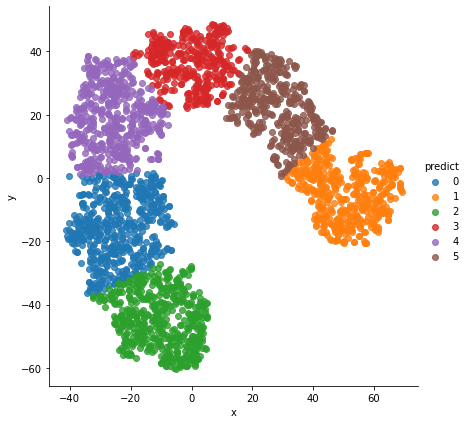

In [120]:
sns.lmplot('x', 'y', data=results, fit_reg=False, size=6, hue='predict')